# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [4]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
# print(X)
# print(y)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

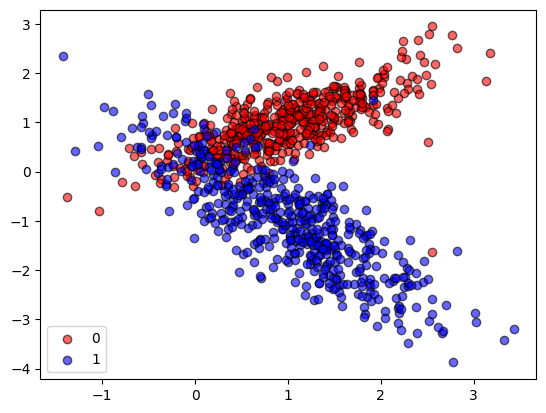

In [5]:
### WRITE YOUR CODE HERE ###

# "alpha = 0.6" adds transparency to the dots
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolors='black', alpha=0.6, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', edgecolors='black', alpha=0.6, label='1')
# X[y == 0, 0], X[y == 0, 1] means coordinates(features of the sample) of the red dots

plt.legend(loc= 'best')
plt.show()

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
# test_size=.33 means that 33% of the data will be used for testing
# random_state=42 is used to make the result reproducible: 난수 시드를 이용해서 랜덤한 데이터를 뽑아서 테스트 데이터로 사용

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

total length of test data: 330
number of misclassified samples: 24
missclasiification rate: 0.07
model accuracy is: 0.93
this model has a accuracy of 0.92, but i don't know if this accuaracy is good or bad.


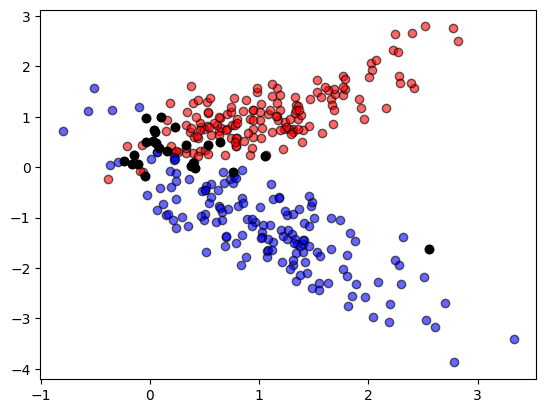

In [7]:
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
clf.fit(X_train, y_train)
predicted = clf.predict(X_test) # predicted values of the test data

plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='red', edgecolors='black', alpha=0.6, label='0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='blue', edgecolors='black', alpha=0.6, label='1')

mis_count = 0
for i in range(len(predicted)):
    if predicted[i] != y_test[i]: 
        plt.scatter(X_test[i, 0], X_test[i, 1], c='black', edgecolors='black')
        mis_count += 1

print(f"total length of test data: {len(y_test)}")
print(f"number of misclassified samples: {mis_count}")
print(f"missclasiification rate: {round(mis_count/len(y_test),2)}")
print(f"model accuracy is: {round(1 - mis_count/len(y_test),2)}")
print("this model has a accuracy of 0.92, but i don't know if this accuaracy is good or bad.")


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [8]:
x_min, x_max = X[:, 0].min(), X[:, 0].max() # x와 y값의 최대 및 최솟값을 구함
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1 # 생성할 그리드의 간격을 정함. decision boundary의 해상도를 결정함.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),            # 이 함수는 주어진 범위 내에서 균일한 간격으로 grid points를 생성함.
                         np.arange(y_min, y_max, h))        # x_min부터 x_max까지 h만큼의 간격으로, 즉 x의 전체범위를 h만큼의 간격으로 나눈 것
                                                            # xx, yy는 2차원 배열이 됨
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # 각 grid point가 클래스 1에 속할 확률을 예측함. ravel()은 xx를 1차원 배열로 펼치는 함수.
Z = Z.reshape(xx.shape) # Z는 결국 확률값을 나타내는 2차원 배열이 됨


#print(xx,"\n")
#print(yy)
#print(Z)


Then we can plot the boundary using the 'contourf' function of matplotlib.

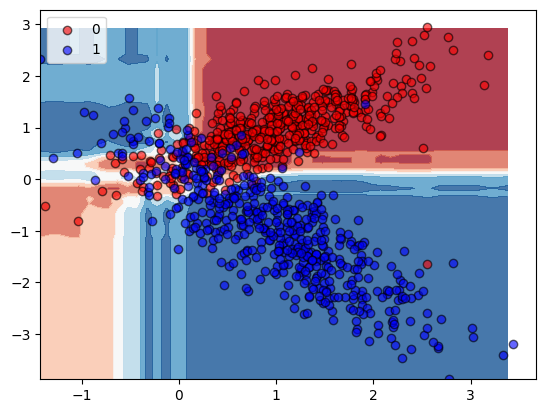

In [9]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm) # dicision boundary를 시각화. xx, yy, Z를 이용해서 등고선 플롯을 생성. cmap은 사용할 컬러맵을 지정함.
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class], # 각 클래스에 대해 플롯을 그린다. 
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

- visualize the dicision boundary. If there is data within the decision boundary, it will be classified into the corresponding class.    
- The interval within the decision boundary has a certain probability, which means the probability that the data will be predicted as a certain class, which is shown as a color in the plot.
- 3D에서 하려면 어떻게 될까? 바운더리는 그냥 그냥 plane이나 sphere형태로 나타나겠지. 
- 0.92의 accuracy는 딱히 overfitting이 아니다. 

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

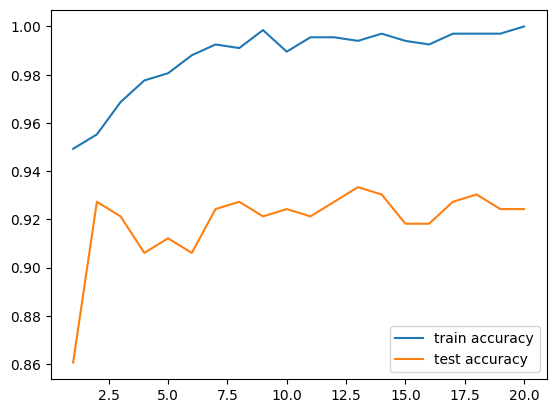

In [10]:
# from sklearn.metrics import accuracy_score
# this package can be used to use accracy_score() function 

train_acc = np.zeros(20)
test_acc = np.zeros(20)

for i in range(0,20):
    clf = RandomForestClassifier(n_estimators=i+1) # random_state=42 can be used, but result is still different
    clf.fit(X_train, y_train)
    
    train_mis_count = 0
    predicted_train = clf.predict(X_train) # predicted values of the train data
    for j in range(len(predicted_train)):
        if predicted_train[j] != y_train[j]: 
            train_mis_count += 1
    
    train_acc[i] = 1 - train_mis_count/len(y_train)
    
    test_mis_count = 0
    predicted_test = clf.predict(X_test) # predicted values of the test data
    for j in range(len(predicted_test)):
        if predicted_test[j] != y_test[j]:
            test_mis_count += 1
            
    test_acc[i] = 1 - test_mis_count/len(y_test)
    
# print(train_acc)
# print(test_acc)

plt.plot(range(1,21), train_acc, label='train accuracy')
plt.plot(range(1,21), test_acc, label='test accuracy')
plt.legend()
plt.show()

# Every time you run the code, the results will be different.
# How to fix random numbers?
# 

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

In [11]:
### WRITE YOUR CODE HERE ###


<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

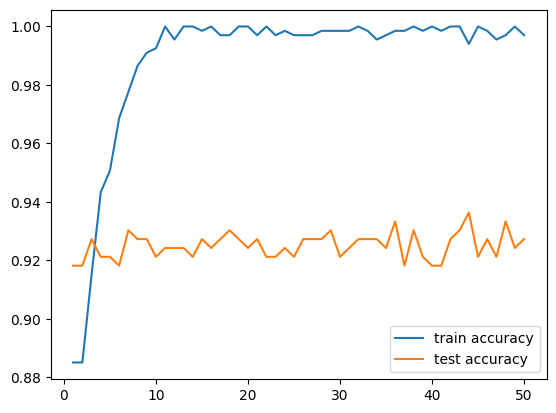

In [12]:
### WRITE YOUR CODE HERE ###
### WRITE YOUR CODE HERE ###
mtrain_acc = np.zeros(50)
mtest_acc = np.zeros(50)


for i in range(0,50):
    clf = RandomForestClassifier(n_estimators=30, max_depth=i+1) # random_state=42 can be used, but result is still different
    clf.fit(X_train, y_train)
    
    train_mis_count = 0
    predicted_train = clf.predict(X_train) # predicted values of the train data
    for j in range(len(predicted_train)):
        if predicted_train[j] != y_train[j]: 
            train_mis_count += 1
    
    mtrain_acc[i] = 1 - train_mis_count/len(y_train)
    
    test_mis_count = 0
    predicted_test = clf.predict(X_test) # predicted values of the test data
    for j in range(len(predicted_test)):
        if predicted_test[j] != y_test[j]:
            test_mis_count += 1
            
    mtest_acc[i] = 1 - test_mis_count/len(y_test)
    
# print(mtrain_acc)
# print(mtest_acc)

plt.plot(range(1,51), mtrain_acc, label='train accuracy')
plt.plot(range(1,51), mtest_acc, label='test accuracy')
plt.legend()
plt.show()

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [13]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [14]:
### WRITE YOUR CODE HERE ###

# nostr_churn = churn_df.select_dtypes(include=[np.number]) # easy way
# nostr_churn.head()

nostr_churn_df = churn_df.copy()
for col in churn_df.columns:
    if type(churn_df[col][0]) == str:
        nostr_churn_df = nostr_churn_df.drop(columns=[col])
        
nostr_churn_df.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

<Axes: >

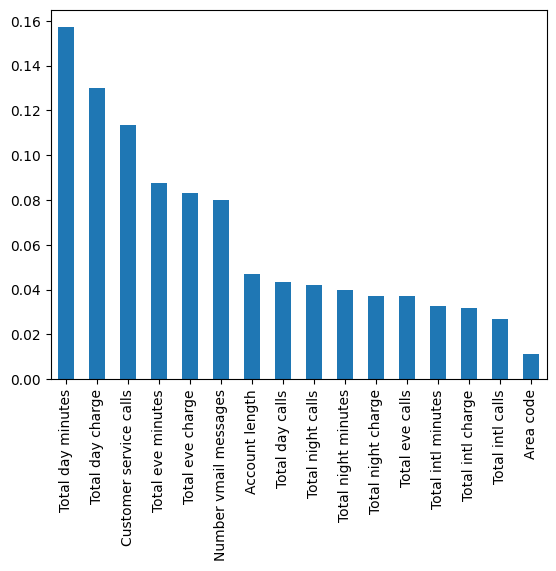

In [18]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(nostr_churn_df, label)
importances = clf.feature_importances_
clf_importances = pd.Series(importances, index=nostr_churn_df.columns)
clf_importances = clf_importances.sort_values(ascending=False)
clf_importances.plot(kind='bar')

## 정답!

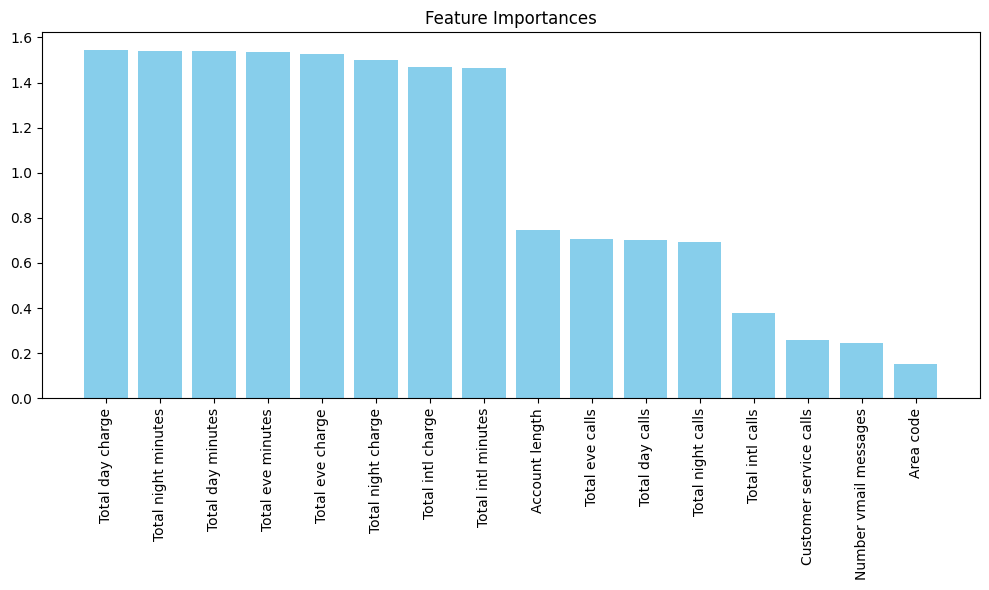

In [16]:
### WRITE YOUR CODE HERE ###

importances = []
column_indices = nostr_churn_df.columns
column_indices_list = list(column_indices)


for col in nostr_churn_df.columns:
    X = nostr_churn_df.drop(columns=[col])  # drop the column that we want to predict
    y = nostr_churn_df[col]                 #  the column that we want to predict
    
    clf = RandomForestRegressor()
    clf.fit(X, y)
    clf.feature_importances_
    thiscol_importances = clf.feature_importances_ # importances for this column
    
    index_of_column = column_indices_list.index(col)
    thiscol_importances = np.insert(thiscol_importances, index_of_column, 0)
    importances.append(thiscol_importances)

importances = np.array(importances)
average_importances = np.sum(importances, axis=0)

indices = np.argsort(average_importances)[::-1]
feature_names = nostr_churn_df.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(average_importances.shape[0]), average_importances[indices], color="skyblue", align="center")
plt.xticks(range(average_importances.shape[0]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# 나도 모르겠다 ㅅㅂ 



<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [26]:
### WRITE YOUR CODE HERE ###
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

train_predicted = clf.predict(X_train)
test_predicted = clf.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print(f"train mse: {train_mse}")
print(f"test mse: {test_mse}")  
print("train mse << test mse, so this model is overfitting.")
print("this model is not good for generalization.")

mean_squared_error(y_test, y_train.mean() * np.ones(len(y_test))) # this is the mse of the mean model

# whats difference between mean squared error and mean absolute error?
# mean squared error is the average of the square of the errors. The larger the error, the more the error is penalized.
# mean absolute error is the average of the absolute values of the errors. The larger the error, the less the error is penalized.
# mean squared error is more sensitive to outliers than mean absolute error.
# mean squared error is more useful when large errors are particularly undesirable.
# mean absolute error is more robust to outliers than mean squared error.
# mean absolute error is more useful when the distribution of errors is not normal.
# mean squared error is more useful when the distribution of errors is normal.


train mse: 1712.2480192471805
test mse: 16276.831583648192
train mse << test mse, so this model is overfitting.
this model is not good for generalization.


47766.53061019355